In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

#Platform Exploration
#Common to all datasets

gen_df = pd.read_csv("gen_player_stats.csv")
activity_df = pd.read_csv("activity_played.csv")
item_df = pd.read_csv("item_spend.csv")

#Cleaning up gen_df dataset
#Noticed that there are values of 0 in daily playtime (which is logically imposibble if the person played for that day)
#So dropping those values and just keeping rows where daily_playtime > 0.00

gen_df = gen_df[gen_df['daily_playtime']>0.00]
gen_df

,account_id,platform_id,occur_date,ltd_days_played,first_day_played,evc_balance,pvc_balance,char_rank,daily_playtime
0,0,XBOX,2020-10-19,184.0,2019-05-11,4.053223e+05,0.0,35.0,0.124253
1,1,PS4,2020-10-19,154.0,2017-03-16,1.686933e+03,0.0,44.0,0.198681
2,2,XBOX,2020-10-19,76.0,2020-02-08,2.351439e+05,0.0,20.0,1.962876
3,3,XBOX,2020-10-19,24.0,2015-10-14,1.414707e+05,0.0,20.0,0.865092
4,4,XBOX,2020-10-19,579.0,2018-05-19,3.238627e+01,0.0,99.0,1.133067
...,...,...,...,...,...,...,...,...,...
247979,9519,PS4,2020-11-24,20.0,2020-10-11,8.179963e+05,0.0,17.0,0.179220
247980,9466,XBOX,2020-11-24,26.0,2020-10-06,2.042292e+04,0.0,18.0,0.839445
247981,9424,PC,2020-11-24,36.0,2020-04-19,1.414782e+04,0.0,151.0,2.556318
247982,9420,XBOX,2020-11-24,144.0,2020-02-01,1.326879e+06,0.0,47.0,0.282507


<AxesSubplot:xlabel='daily_playtime'>

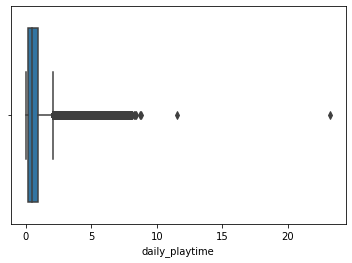

In [117]:
#Detecting outliers using boxplot
import seaborn as sns
sns.boxplot(x=gen_df['daily_playtime'])
#sns.boxplot(x=gen_df[gen_df['pvc_balance']>0]['pvc_balance'])
            
#From the box plot, we noticed that there are many outliers, (which makes sense)
#More robust measure of central tendency would be median
#Best measure of central tendency for daily_playtime in this case would be the median at it is not prone to being impacted outliers,

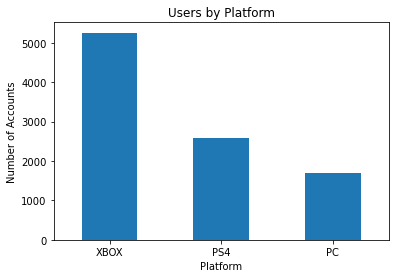

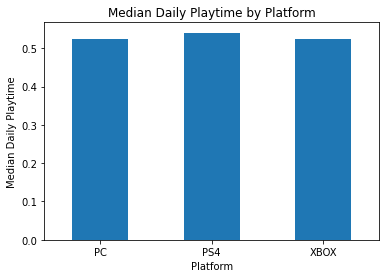

platform_id
PC      0.628205
PS4     0.645050
XBOX    0.630136
Name: dp_mean, dtype: float64
platform_id
PC      0.524325
PS4     0.540608
XBOX    0.524906
Name: dp_mean, dtype: float64


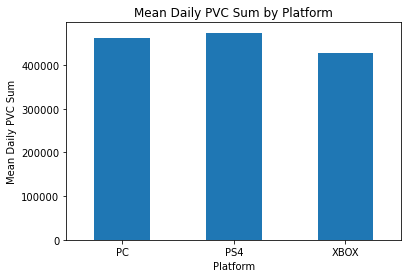

platform_id
PC      463084.426012
PS4     474387.988071
XBOX    427303.742169
Name: pvc_sum, dtype: float64
platform_id
PC      0.0
PS4     0.0
XBOX    0.0
Name: pvc_sum, dtype: float64


In [337]:
#Exploring the general dataframe

#1. Which platform has most users (i.e. account ids associated with it)? not insightful enough

#Removing duplicate account_ids, then counting
gen_df.drop_duplicates(subset=['account_id'])["platform_id"].value_counts().plot.bar(rot=0)
plt.xlabel("Platform")
plt.ylabel("Number of Accounts")
plt.title("Users by Platform")
plt.show()

d = {'daily_playtime':'dp_mean', 'pvc_balance':'pvc_sum'}
df= gen_df.groupby('account_id').agg({'daily_playtime':'mean', 'pvc_balance':'sum'}).rename(columns=d)

#merging data on account id
df_merge = df.join(gen_df[['account_id','platform_id']], on = 'account_id', how = 'left')

#Now resulting dataframe has, account_id, platform_id, player's mean daily time, sum of pvc balance
#Since multiple players occur several times in the data frame, I will aggregate the data so that 
df_merge.groupby('platform_id')['dp_mean'].median().plot.bar(rot=0)
plt.xlabel("Platform")
plt.ylabel("Median Daily Playtime")
plt.title("Median Daily Playtime by Platform")
plt.show()

print(df_merge.groupby('platform_id')['dp_mean'].mean())
print(df_merge.groupby('platform_id')['dp_mean'].median())

#Keeping it mean for pvc_sum as there are many many 0's
df_merge.groupby('platform_id')['pvc_sum'].mean().plot.bar(rot=0)
plt.xlabel("Platform")
plt.ylabel("Mean Daily PVC Sum")
plt.title("Mean Daily PVC Sum by Platform")
plt.show()

print(df_merge.groupby('platform_id')['pvc_sum'].mean())
print(df_merge.groupby('platform_id')['pvc_sum'].median())

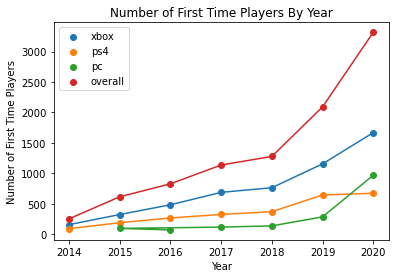

In [252]:
#Separating year
year = [int(date.split("-")[0]) for date in gen_df['first_day_played']]
gen_df['fdp_year'] = year

#Analyzing line graph number of users by year by platform
x_box_subset = gen_df[gen_df['platform_id']=="XBOX"]
ps4_subset = gen_df[gen_df['platform_id']=="PS4"]
pc_subset =gen_df[gen_df['platform_id']=="PC"]
'''
df = pd.DataFrame({
    'xbox': [20, 18, 489, 675, 1776],
    'ps4': [4, 25, 281, 600, 1900]
        ''}, index=[1990, 1997, 2003, 2009, 2014])
lines = df.plot.line()

dict1 = {}
for platform in gen_df['platform_id'].unique():
    plat_subset = gen_df[gen_df['platform_id']==platform]
    data = np.flip(plat_subset.drop_duplicates(subset=['account_id'])["fdp_year"].value_counts().to_numpy())
    #dict1[]
'''
xbox = x_box_subset.drop_duplicates(subset=['account_id'])["fdp_year"].value_counts()
ps4 = ps4_subset.drop_duplicates(subset=['account_id'])["fdp_year"].value_counts()
pc = pc_subset.drop_duplicates(subset=['account_id'])["fdp_year"].value_counts()
gen = gen_df.drop_duplicates(subset=['account_id'])["fdp_year"].value_counts()

plt.plot(xbox)
plt.plot(ps4)
plt.plot(pc)
plt.plot(gen)
plt.xlabel("Year")
plt.ylabel("Number of First Time Players")
plt.title("Number of First Time Players By Year")
plt.scatter(xbox.index,xbox, label = 'xbox')
plt.scatter(ps4.index,ps4, label = 'ps4')
plt.scatter(pc.index,pc, label = 'pc')
plt.scatter(gen.index,gen, label = 'overall')
plt.legend()

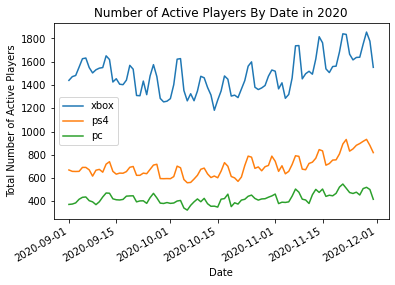

In [240]:
#Now let's look at trend for year 2020 (month wise)
from datetime import datetime
gen_df["oc_date_formatted"] = [datetime.fromisoformat(date) for date in gen_df['occur_date']]

#Analyzing line graph number of users by year by platform
x_box_subset2 = gen_df[gen_df['platform_id']=="XBOX"]
ps4_subset2 = gen_df[gen_df['platform_id']=="PS4"]
pc_subset2 =gen_df[gen_df['platform_id']=="PC"]

x_box_subset2["oc_date_formatted"].value_counts().plot()
ps4_subset2["oc_date_formatted"].value_counts().plot()
pc_subset2["oc_date_formatted"].value_counts().plot()
plt.xlabel("Date")
plt.ylabel("Total Number of Active Players")
plt.title("Number of Active Players By Date in 2020")
plt.legend(['xbox','ps4','pc'])

<AxesSubplot:xlabel='time_spent'>

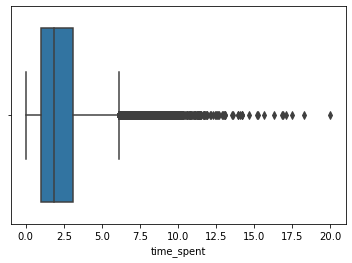

In [290]:
activity_df
sns.boxplot(x=ps4_act['time_spent'])

Text(0.5, 1.0, 'Average Time Spent on Activity Type for PS4')

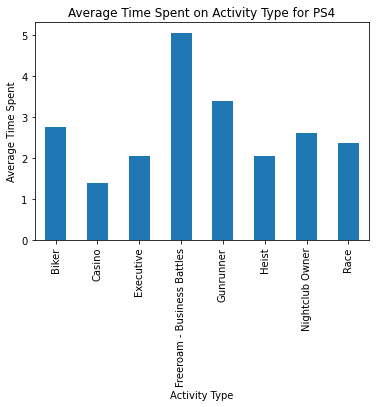

In [339]:
ps4_act = activity_df[activity_df["platform_id"] == "PS4"]
#ps4_act.groupby("activity_type")['time_spent'].mean().plot.bar()
ps4_act.groupby("activity_type")['time_spent'].mean().plot.bar()
plt.xlabel("Activity Type")
plt.ylabel("Average Time Spent")
plt.title("Average Time Spent on Activity Type for PS4")

Text(0.5, 1.0, 'Mean Money Earned by Activity Type for PS4')

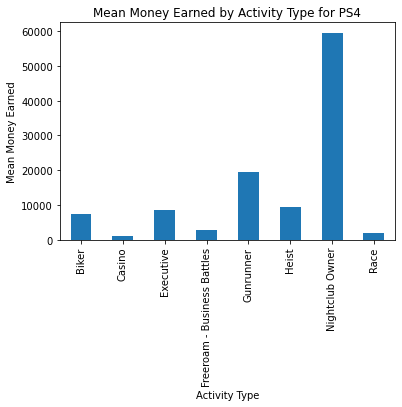

In [297]:
ps4_act = activity_df[activity_df["platform_id"] == "PS4"]
#ps4_act.groupby("activity_type")['time_spent'].mean().plot.bar()
ps4_act.groupby("activity_type")['money_earned'].mean().plot.bar()
plt.xlabel("Activity Type")
plt.ylabel("Mean Money Earned")
plt.title("Mean Money Earned by Activity Type for PS4")

In [4]:
item_df

,account_id,platform_id,occur_date,item,item_type,item_sub_type,money_spent
0,1295,PS4,2020-10-24,Imponte Dukes,CAR,MUSCLE,24734.421385
1,3820,PS4,2020-11-12,Vapid GB200,CAR,SPORTS,375005.743577
2,193,PS4,2020-11-27,Vulcar Warrener,CAR,SEDAN,47873.073648
3,4945,PS4,2020-11-27,Cheval Marshall,CAR,OFF ROAD,0.000000
4,4237,XBOX,2020-09-02,Albany V-STR,CAR,SPORTS,512640.830316
...,...,...,...,...,...,...,...
155745,5824,PC,2020-11-02,Heavy Shotgun,WEAPON,SHOTGUNS,5405.667899
155746,5824,PC,2020-11-02,Knuckle Duster,WEAPON,MELEE,2992.067103
155747,5304,XBOX,2020-11-02,Heavy Shotgun,WEAPON,SHOTGUNS,5405.667899
155748,4626,PC,2020-11-02,Knuckle Duster,WEAPON,MELEE,2992.067103


In [327]:
#Cleaning up item 

#Sport repetitions
item_df['item_sub_type'] = item_df['item_sub_type'].replace("SPORT_CLASSIC","SPORT")
item_df['item_sub_type'] = item_df['item_sub_type'].replace("SPORTS CLASSIC","SPORT").replace("SPORTS","SPORT")
item_df['item_sub_type'] = item_df['item_sub_type'].replace("SPORT CLASSIC","SPORT")

#Compact reps
item_df['item_sub_type'] = item_df['item_sub_type'].replace("COMPACTS","COMPACT")

#Compact reps
item_df['item_sub_type'] = item_df['item_sub_type'].replace("OFF_ROAD","OFF ROAD")
item_df['item_sub_type'] = item_df['item_sub_type'].replace("OFF-ROAD","OFF ROAD")
item_df['item_sub_type'] = item_df['item_sub_type'].replace("VANS","VAN")

ps4_item = item_df[item_df["platform_id"] == "PS4"]
ps4_item

,account_id,platform_id,occur_date,item,item_type,item_sub_type,money_spent
0,1295,PS4,2020-10-24,Imponte Dukes,CAR,MUSCLE,24734.421385
1,3820,PS4,2020-11-12,Vapid GB200,CAR,SPORT,375005.743577
2,193,PS4,2020-11-27,Vulcar Warrener,CAR,SEDAN,47873.073648
3,4945,PS4,2020-11-27,Cheval Marshall,CAR,OFF ROAD,0.000000
5,9473,PS4,2020-09-02,Grotti Turismo R,CAR,SUPER,0.000000
...,...,...,...,...,...,...,...
155727,6667,PS4,2020-10-28,Nightstick,WEAPON,MELEE,142.023452
155734,103,PS4,2020-11-23,Tear Gas,WEAPON,PROJECTILES,58.644515
155737,2733,PS4,2020-11-24,Pool Cue,WEAPON,MELEE,2493.389253
155738,724,PS4,2020-11-24,Unholy Hellbringer,WEAPON,MACHINE GUNS,105325.549333


,item_type,money_spent
item_type,1.000000,-0.470691
money_spent,-0.470691,1.000000


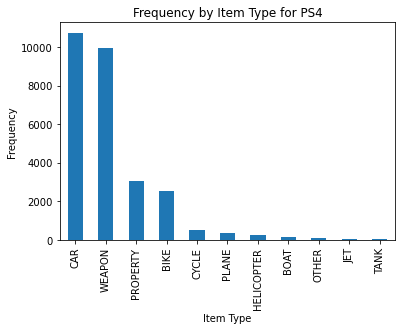

In [340]:
s0 = ps4_item['item_type'].value_counts()
s0.plot.bar()
plt.xlabel("Item Type")
plt.ylabel("Frequency")
plt.title("Frequency by Item Type for PS4")

s01 = ps4_item.groupby('item_type')['money_spent'].mean()
combined_series3 = pd.concat([s0, s01], axis=1)
combined_series3.corr()

Text(0.5, 1.0, 'Frequency by Item Subtype for Car Type')

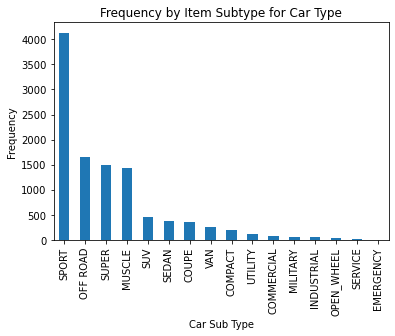

In [342]:
s1 = ps4_item[ps4_item['item_type']=="CAR"]['item_sub_type'].value_counts()
s1.plot.bar()
plt.xlabel("Car Sub Type")
plt.ylabel("Frequency")
plt.title("Frequency by Item Subtype for Car Type")

In [328]:
s2 = ps4_item[ps4_item['item_type']=="CAR"]
s2['item_sub_type'].unique() #multiple repetition
#comnining them into one
s2['item_sub_type'].unique()

array(['MUSCLE', 'SPORT', 'SEDAN', 'OFF ROAD', 'SUPER', 'UTILITY',
       'COMMERCIAL', 'COUPE', 'SUV', 'VAN', 'COMPACT', 'INDUSTRIAL',
       'OPEN_WHEEL', 'MILITARY', 'SERVICE', 'EMERGENCY'], dtype=object)

,item_sub_type,money_spent
item_sub_type,1.000000,-0.168589
money_spent,-0.168589,1.000000


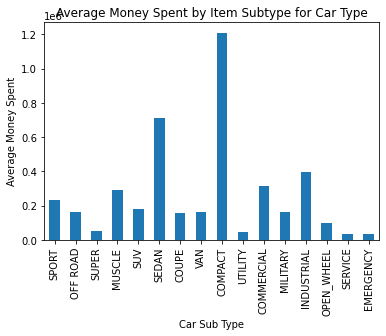

In [343]:
s2 = ps4_item[ps4_item['item_type']=="CAR"].groupby('item_sub_type')['money_spent'].mean()
s2.plot.bar()
s1.plot.bar()
plt.xlabel("Car Sub Type")
plt.ylabel("Average Money Spent")
plt.title("Average Money Spent by Item Subtype for Car Type")
#finding if there is a correlation between frequency of subtype and mean money spent 
combined_series = pd.concat([s1, s2], axis=1)
combined_series.corr()

Text(0.5, 1.0, 'Frequency by Item Subtype for Weapon Type')

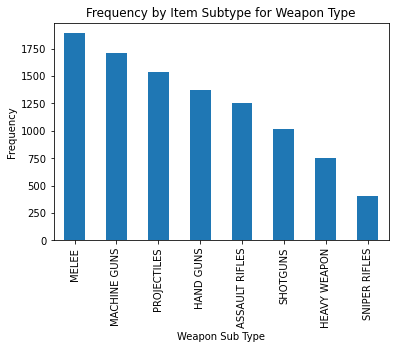

In [344]:
s3 = ps4_item[ps4_item['item_type']=="WEAPON"]['item_sub_type'].value_counts()
s3.plot.bar()
plt.xlabel("Weapon Sub Type")
plt.ylabel("Frequency")
plt.title("Frequency by Item Subtype for Weapon Type")

Text(0.5, 1.0, 'Average Money Spent by Item Subtype for Weapon Type')

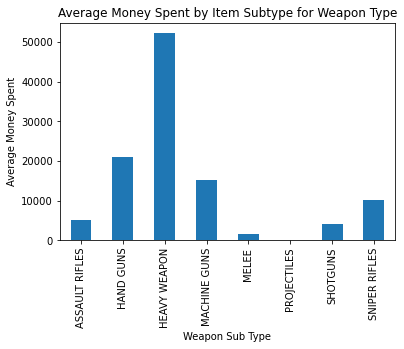

In [345]:
s4 = ps4_item[ps4_item['item_type']=="WEAPON"].groupby('item_sub_type')['money_spent'].mean()
s4.plot.bar()
plt.xlabel("Weapon Sub Type")
plt.ylabel("Average Money Spent")
plt.title("Average Money Spent by Item Subtype for Weapon Type")

Text(0.5, 1.0, 'Total Money Spent by Item Subtype for Weapon Type')

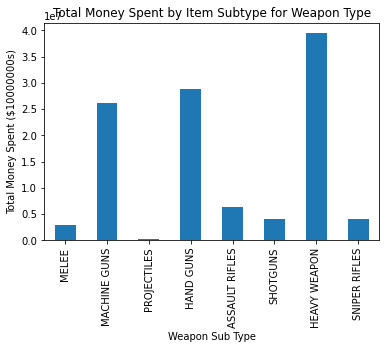

In [352]:
combined_series2 = pd.concat([s3, s4], axis=1)
#combined_series2[combined_series2['item_type']=="WEAPON"].groupby('item_sub_type')
combined_series2["total_money"] = combined_series2["money_spent"] * combined_series2["item_sub_type"]
combined_series2["total_money"].plot.bar()
plt.xlabel("Weapon Sub Type")
plt.ylabel("Total Money Spent ($10000000s)")
plt.title("Total Money Spent by Item Subtype for Weapon Type")

Text(0.5, 1.0, 'Total Money Spent by Item Subtype for Car Type')

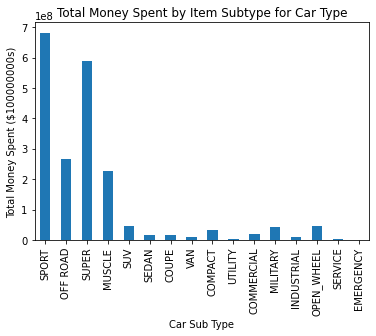

In [354]:
#significance tests
combined_series["total_money"] = combined_series["money_spent"] * combined_series["item_sub_type"]
combined_series["total_money"].plot.bar()
combined_series
plt.xlabel("Car Sub Type")
plt.ylabel("Total Money Spent ($100000000s)")
plt.title("Total Money Spent by Item Subtype for Car Type")